# Telecom customer churn Analysis

Description: The objective of this dataset is to predict the customer churn in telecom industry. To perform several modelling to analysis 
predict reasons of churn so that industries can work on it to improve customer retention. This Problem is classification type.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Getting the Dataset

In [3]:
churn=pd.read_csv("Telecom_customer_churn.csv")

In [4]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.shape

(7043, 21)

In [6]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From this data we can analyse that there are 21 columns and 7043 rows. Here the target variable is 'Churn' rest are independant variables.
As well, there are total 18 object type, 2 intezer type and 1 float type. We also noticed that there is no any missing values.

In [7]:
#checking null values

In [8]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Thus here confirm once again that there are no null values.

In [9]:
#statistical Summary

In [10]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


As we can see only 3 columns are representing the statistical data as rest of the columns are in object type thus need to convert it into numerical values.

# Data Preprocessing 

In [11]:
#Converting categorical values into numerical values
#As there are many columns taking values more than 2(yes or no) thus we need to use ordinal Encoder to convert them into strings

In [12]:
#Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

for i in churn.columns:
    if churn[i].dtypes=="object":
        churn[i]=oe.fit_transform(churn[i].values.reshape(-1,1))
  
  
    

In [13]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


Here we can see that all columns values converted to numerical.

# EDA

Now we can visualise the independant variables with target variables as its now converted in numerical.

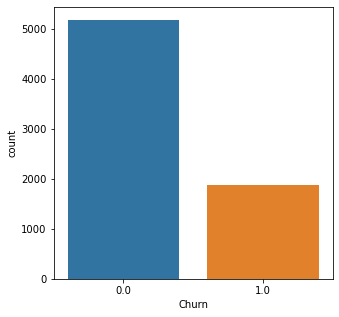

In [14]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=churn['Churn'],linewidth=1)
plt.show()

This graph shows the imbalance between churn customers and non churn customers which will be fixed later.
0 representing the Non churners and 1 as churners.Total number of churn customers are around 2000 and non-churn customers are more than 5000.

In [15]:
#visualizing churn counts with other features

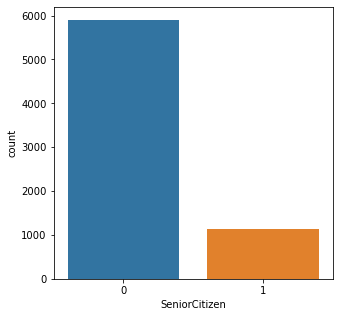

In [16]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=churn['SeniorCitizen'],linewidth=1)
plt.show()

From above graph we can see that there are seniorcitizen count is less than non senior citizen count. Count for senior citizen is around 1000
and for non senior citizen its around 6000.

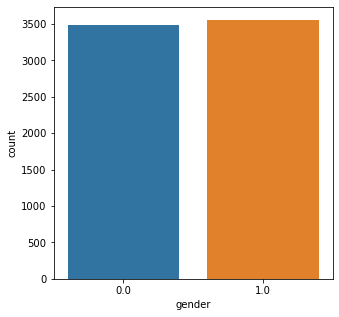

In [17]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=churn['gender'],linewidth=1)
plt.show()


Here we can observe that Female(0) count is around 3500 and male(1) count is more than 3500.

0.0    3641
1.0    3402
Name: Partner, dtype: int64


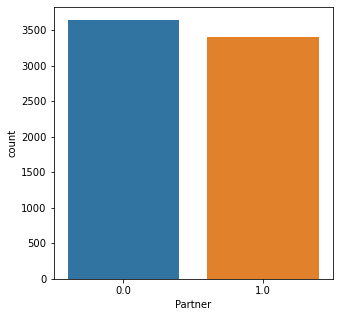

In [18]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=churn['Partner'],linewidth=1)
print(churn['Partner'].value_counts())


Here we can onserve that married(1) counts are 3402 and unmarried(0) counts are 3641

0.0    4933
1.0    2110
Name: Dependents, dtype: int64


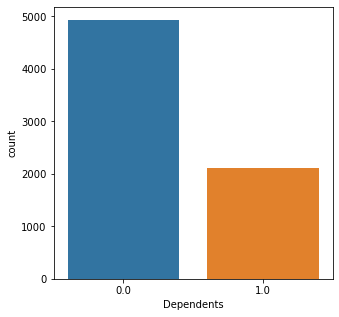

In [19]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=churn['Dependents'],linewidth=1)
print(churn['Dependents'].value_counts())

Here we can observe that total count of dependant(1) customers are 2110 and independant customers are 4933.

1.0    6361
0.0     682
Name: PhoneService, dtype: int64


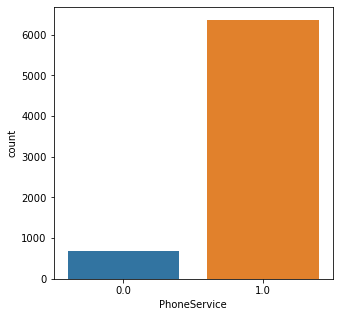

In [20]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=churn['PhoneService'],linewidth=1)
print(churn['PhoneService'].value_counts())

From above graph we can observe that total number of phone service(1) users are 6361 and total number of non phone users(0) are 682 

0.0    3390
2.0    2971
1.0     682
Name: MultipleLines, dtype: int64


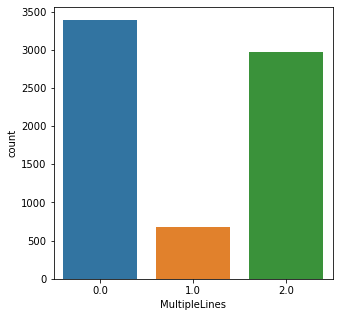

In [21]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=churn['MultipleLines'],linewidth=1)
print(churn['MultipleLines'].value_counts())

In multiple lines, we have 3 categories - from graph we can see that customers not using phone service(1) are very least count 682, customers using multiple line(2) are
2971 and customers not using multiple lines(0) are 3390

1.0    3096
0.0    2421
2.0    1526
Name: InternetService, dtype: int64


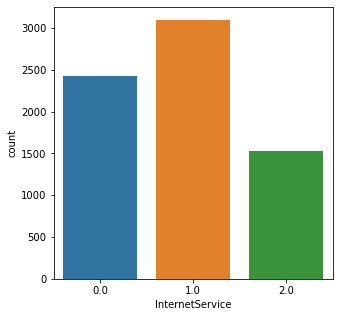

In [22]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=churn['InternetService'],linewidth=1)
print(churn['InternetService'].value_counts())

From above graph we can see that optic fibre users(1) are 3096, DSL customers(0) are 2421 and customers not using internet service(2) counts are 1526 

0.0    3498
2.0    2019
1.0    1526
Name: OnlineSecurity, dtype: int64


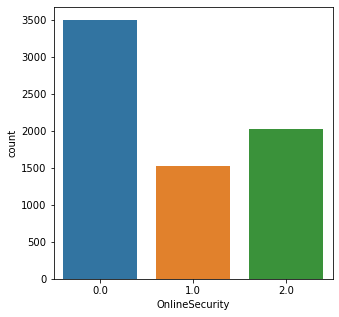

In [23]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x=churn['OnlineSecurity'],linewidth=1)
print(churn['OnlineSecurity'].value_counts())

Here the customers that are using online security(1) are 1526 and customers not using any onliner service(2) are 2019 and customers who are using
online security services are 3498

In [24]:
#Like this we can perform visualization with other features to get the actual counts.

Checking the visualization of features with tenure column.

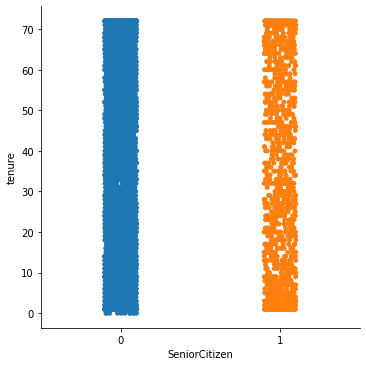

In [25]:
sns.catplot(x='SeniorCitizen',y='tenure', data=churn)
            

Here from above graph we can see there is not much difference with 'tenure' terms on seniorcitizen and non seniorcitizen. The graph is almost same.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

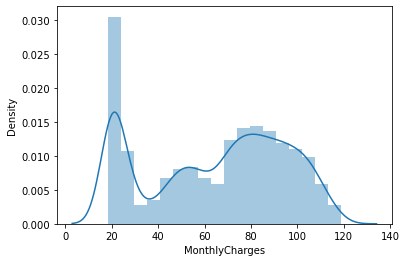

In [26]:
sns.distplot(churn['MonthlyCharges'],kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

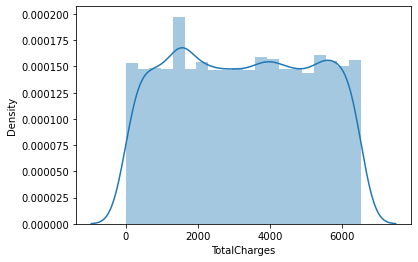

In [27]:
sns.distplot(churn['TotalCharges'],kde=True)

From above graphs we can analyse the distribution and as somw part of data going out from the normal distribution thus it shows that 
there are some outliers present.

In [28]:
churn.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


Here we can see the complete statistical summary of all columns
Here we can see the mean, max, min values of complete dataset

# Checking Correlation with target variable 

In [29]:
churn.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.003027,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.005291,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.037653,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.059568,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.009572,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.158523,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.083195,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.114955,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.055724,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.042357,-0.289309


<AxesSubplot:>

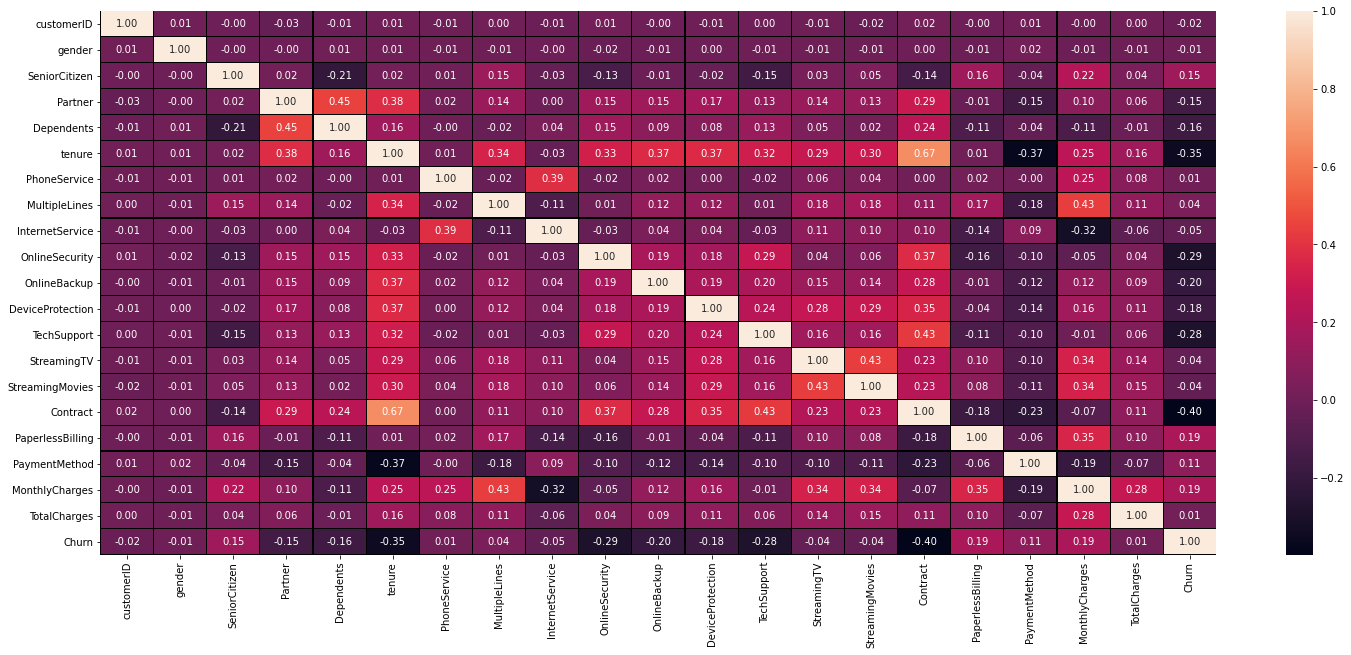

In [30]:
plt.figure(figsize=(25,10))
sns.heatmap(churn.corr(),annot=True,linewidths=.1,linecolor='black',fmt='.2f')

From above heatmap graph we can analyse that target variable 'Churn' are not much positively correlated.showing high positive  correlation with 'Monthlycharges' and 'paperlessbilling' mostly are negatively correlated as shown in graph.

In [31]:
#Now we can check with graph that which columns are highly related to target variable 'Churn'.

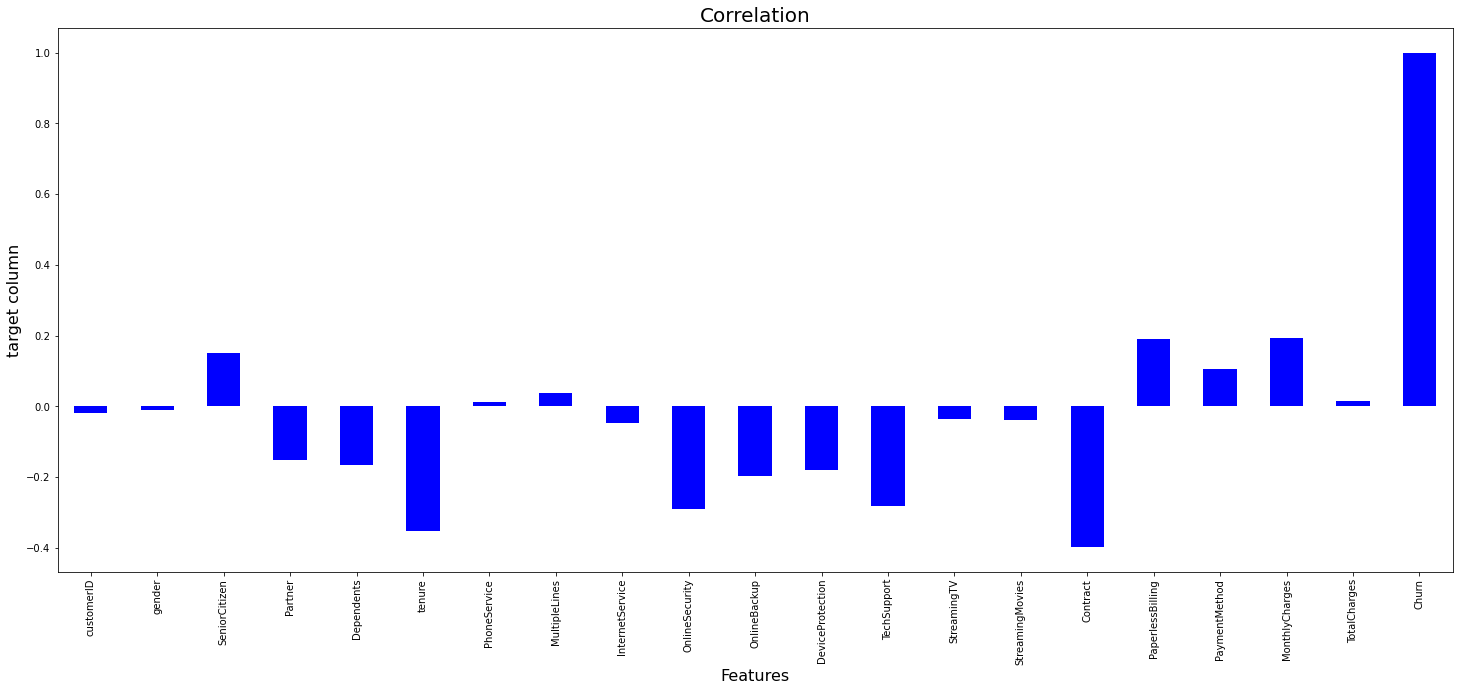

In [32]:
plt.figure(figsize=(25,10))
churn.corr()['Churn'].plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=16)
plt.ylabel('target column',fontsize=16)
plt.title('Correlation',fontsize=20)
plt.show()


Here we can see columns are very less positive and highly negative correlated with 'Churn' feature. Max Positive correlation with 'Monthlycharges' and 'paperlessbilling' rest are very less. Maximum columns are negatively correlated as shown above.

# Checking the Skewness of Dataset

In [33]:
churn.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

checking the columns which are not lieing in range of +/-0.5(Standard Value) are 'SeniorCitizen','Dependents','PhoneService','Contract','Churn' that are categorical column so we can say that data is not skewed and no treatment is required.


# Checking Outliers

In [34]:
churn.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [35]:
#Boxplot graph to check outliers.

<AxesSubplot:>

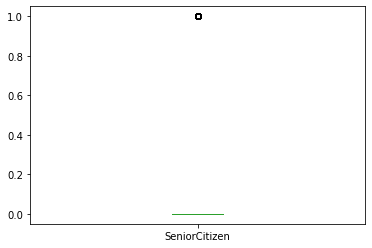

In [36]:
churn['SeniorCitizen'].plot.box()

Showing outlier in senior citizen

<AxesSubplot:>

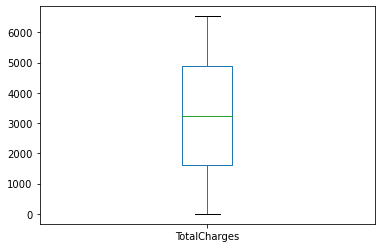

In [37]:
churn['TotalCharges'].plot.box()

No Outliers

<AxesSubplot:>

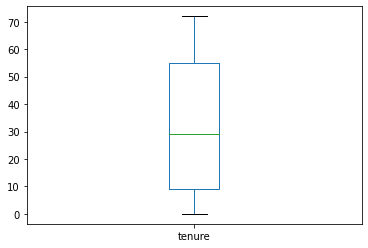

In [38]:
churn['tenure'].plot.box()

No outlier

As seniorcitizen is nominal type thus we can't consider it as outlier so no outlier removal is required here.

In [39]:
#Dropping CustomerID as its not contributing in prediction

In [40]:
churn= churn.drop(['customerID'],axis=1)
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Spilitting in X and Y

In [41]:
x=churn.drop("Churn",axis=1)
y=churn['Churn']

# Scaling the data using MinMax Scaler

In [156]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()

In [157]:
feature_mns=['tenure','MonthlyCharges','TotalCharges']
churn_feature_mns=pd.DataFrame(churn,columns=feature_mns)
churn_remaining_feature=churn.drop(columns=feature_mns)
rescaled_feature=mns.fit_transform(churn_feature_mns)

In [158]:
churn_rescaled_feature=pd.DataFrame(rescaled_feature,columns=feature_mns,index=churn_remaining_feature.index)
churn=pd.concat([churn_remaining_feature,churn_rescaled_feature],axis=1)

In [159]:
churn

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.013889,0.115423,0.383614
1,1.0,0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.472222,0.385075,0.224502
2,1.0,0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.027778,0.354229,0.024043
3,1.0,0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.625000,0.239303,0.214395
4,0.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.027778,0.521891,0.141654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,0.0,0.333333,0.662189,0.244564
7039,0.0,0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,1.000000,0.845274,0.872588
7040,0.0,0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.152778,0.112935,0.458499
7041,1.0,1,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.055556,0.558706,0.407351


Hence we performed feature scaling using minmax scaling.

# Model Building

In [192]:

from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import accuracy_score, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [161]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Logistic Regression

In [120]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,y_test)*100,2)


The accuracy of the Logistic Regression is 81.33427963094393 2


In [121]:
#cross validation for Logistic Regression

In [122]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)
print("cross validation score of Logistic Regression model :",scr.mean()*100,2)

cross validation score of Logistic Regression model : 79.93762702432416 2


Thus our predictions are almost 81% accurate, i.e. for our logistic regression model.
and the Cross Validation score is 80% 

# Random Forest Classifier

In [162]:
RFC = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print('The accuracy of the Randonforestclassifier is',metrics.accuracy_score(predRFC,y_test)*100,2)

The accuracy of the Randonforestclassifier is 80.90844570617459 2


In [127]:
#cross validation for Random Forest Classifier

In [163]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(RFC,x,y,cv=5)
print("cross validation score of RandomForestClassifier model :",scr.mean()*100,2)

cross validation score of RandomForestClassifier model : 79.7104853538938 2


Thus our predictions for RandomForestClassifier are almost 81% accurate, i.e. for our RandomForestClassifier model. and the Cross Validation score is 80%

# Decision Tree Classifier

In [164]:
dtc= DecisionTreeClassifier(random_state=1)
dtc.fit(x_train,y_train)
preddtc = dtc.predict(x_test) 
print('The accuracy of the Decision Tree Classifier is',metrics.accuracy_score(preddtc,y_test)*100,2)

The accuracy of the Decision Tree Classifier is 72.249822569198 2


In [134]:
#cross validation for DecisionTreeClassifier

In [135]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dtc,x,y,cv=5)

In [136]:
print("cross validation score of RandomForestClassifier model :",scr.mean()*100,2)

cross validation score of RandomForestClassifier model : 72.72462134653848 2


Thus our predictions for DecisionTreeClassifier are almost 73% accurate, i.e. for our DecisionTreeClassifier model. and the Cross Validation score is 73%

# KNN

In [171]:
KNN = KNeighborsClassifier(n_neighbors = 3) 
KNN.fit(x_train, y_train)  
y_pred = KNN.predict(x_test)  
print('The accuracy of the KNeighborsClassifier is', round(KNN.score(x_train, y_train) * 100, 2))

The accuracy of the KNeighborsClassifier is 84.81


In [172]:
#cross validation for KNeighborsClassifier

In [173]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(KNN,x,y,cv=5)

In [174]:
print("cross validation score of KNeighborsClassifier model :",scr.mean()*100,2)

cross validation score of KNeighborsClassifier model : 73.73270049680623 2


Thus our predictions for KNeighborsClassifier are almost 84.81% accurate, i.e. for our KNeighborsClassifier model. and the Cross Validation score is 73.73%

# Support Vector Machine

In [178]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',probability=True)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)  
print('The accuracy of the Support Vector Machine is', round(svm.score(x_train, y_train) * 100, 2))

The accuracy of the Support Vector Machine is 73.45


In [179]:
#cross validation for Support Vector Machine

In [180]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svm,x,y,cv=5)

In [181]:
print("cross validation score of Support Vector Machine model :",scr.mean()* 100, 2)

cross validation score of Support Vector Machine model : 73.46301575908123 2


Thus our predictions for Support Vector Machine are almost 73.75% accurate, i.e. for our Support Vector Machine model. and the Cross Validation score is 74%

Observation: We can see that from all performed models the best accuracy model considered is Logistic Regression and RandomForestClassifier
    as these are with no or least difference between accuracy and cross validation score; so hyper tuning will be performed on one of these.

# Hyper Parameter Tuning

In [182]:
#Performing GridSearchCV using Logistic Regression 

In [183]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

In [184]:
LR_cv=GridSearchCV(LR,grid,cv=10)

In [185]:
LR_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",LR_cv.best_params_)
print("accuracy :",LR_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.7949938903795524


Thus our predictions are almost 80% accurate with Logistic Regression, i.e. we have identified 80% of the churn analysis prediction correctly for our Logistic Regression with grid search.

# Saving The Model

In [152]:
import joblib

In [153]:
joblib.dump(LR_cv.best_estimator_,"Telecom_customer_churnModelIDTC.pkl")

['Telecom_customer_churnModelIDTC.pkl']

Conclusion: Best Accurate model is Logistic Regression & Random Forest Classifier; So here the best model 'Logistic Regression' has been saved to calculate the accuracy score and predict outcomes on new data.